# Massive Data Processing 
## Spark Practice
Studend: David Sánchez Marín
### 2.- Practice: Calculate dataset statistics  (2.5%)

In [1]:
import pyspark
sc = pyspark.SparkContext('local[*]')

In [2]:
### 2.- Practice: Calculate dataset statistics  (2.5%)
import os, shutil
import unicodedata
from operator import add

input = sc.textFile("../Datasets/ml-100k/u.item")
print "*", input
print ""
movie = input.map(lambda line: line.split("|"))
print "*", movie
print ""
print "* Movies: ", movie.count()
print ""
print "* First Movie: ", movie.first()
print ""
print "* First 5 movies: ", movie.take(5)

* ../Datasets/ml-100k/u.item MapPartitionsRDD[1] at textFile at NativeMethodAccessorImpl.java:0

* PythonRDD[2] at RDD at PythonRDD.scala:48

* Movies:  1682

* First Movie:  [u'1', u'Toy Story (1995)', u'01-Jan-1995', u'', u'http://us.imdb.com/M/title-exact?Toy%20Story%20(1995)', u'0', u'0', u'0', u'1', u'1', u'1', u'0', u'0', u'0', u'0', u'0', u'0', u'0', u'0', u'0', u'0', u'0', u'0', u'0']

* First 5 movies:  [[u'1', u'Toy Story (1995)', u'01-Jan-1995', u'', u'http://us.imdb.com/M/title-exact?Toy%20Story%20(1995)', u'0', u'0', u'0', u'1', u'1', u'1', u'0', u'0', u'0', u'0', u'0', u'0', u'0', u'0', u'0', u'0', u'0', u'0', u'0'], [u'2', u'GoldenEye (1995)', u'01-Jan-1995', u'', u'http://us.imdb.com/M/title-exact?GoldenEye%20(1995)', u'0', u'1', u'1', u'0', u'0', u'0', u'0', u'0', u'0', u'0', u'0', u'0', u'0', u'0', u'0', u'0', u'1', u'0', u'0'], [u'3', u'Four Rooms (1995)', u'01-Jan-1995', u'', u'http://us.imdb.com/M/title-exact?Four%20Rooms%20(1995)', u'0', u'0', u'0', u'0', u'0', u'

In [3]:
def convert_year(x):
     try:
       return int(x[-4:])
     except:
       return 0 

In [4]:
movie_cero = movie.filter(lambda m: m[2]!='')
print movie_cero.count()
print movie_cero.first()

1681
[u'1', u'Toy Story (1995)', u'01-Jan-1995', u'', u'http://us.imdb.com/M/title-exact?Toy%20Story%20(1995)', u'0', u'0', u'0', u'1', u'1', u'1', u'0', u'0', u'0', u'0', u'0', u'0', u'0', u'0', u'0', u'0', u'0', u'0', u'0']


In [5]:
movie_year = movie.filter(lambda m: m[2]!='')\
            .map(lambda m: (convert_year(m[2]), 1))
movie_year_reduced = movie_year.reduceByKey(add)\
            .sortByKey()
print ""
print "* Movies by year: ", movie_year_reduced.collect()

movies_1994 = movie_year_reduced.filter(lambda m: m[0]==1994)
print ""
print "* Movies year 1994: ", movies_1994.first()[1]

movie_inverse = movie_year_reduced.map(lambda (y, n): (n, y))
movie_count = movie_year_reduced.map(lambda m: m[1])
            
print ""
print "* Maximum movies/year: ", movie_inverse.max()
print ""
print "* Maximum movies/year: ", movie_inverse.min()
print ""
print "* Average movies/year: ", movie_count.mean()
print ""
print "* Standard desviation movies/year: ", movie_count.stdev()



* Movies by year:  [(1922, 1), (1926, 1), (1930, 1), (1931, 1), (1932, 1), (1933, 2), (1934, 4), (1935, 4), (1936, 2), (1937, 4), (1938, 3), (1939, 7), (1940, 8), (1941, 5), (1942, 2), (1943, 4), (1944, 5), (1945, 4), (1946, 5), (1947, 5), (1948, 3), (1949, 4), (1950, 7), (1951, 5), (1952, 3), (1953, 2), (1954, 7), (1955, 5), (1956, 4), (1957, 8), (1958, 9), (1959, 4), (1960, 5), (1961, 3), (1962, 5), (1963, 6), (1964, 2), (1965, 5), (1966, 2), (1967, 5), (1968, 6), (1969, 4), (1970, 3), (1971, 7), (1972, 3), (1973, 4), (1974, 8), (1975, 6), (1976, 5), (1977, 4), (1978, 4), (1979, 9), (1980, 8), (1981, 12), (1982, 13), (1983, 5), (1984, 8), (1985, 7), (1986, 15), (1987, 13), (1988, 11), (1989, 15), (1990, 24), (1991, 22), (1992, 37), (1993, 126), (1994, 214), (1995, 219), (1996, 355), (1997, 286), (1998, 65)]

* Movies year 1994:  214

* Maximum movies/year:  (355, 1996)

* Maximum movies/year:  (1, 1922)

* Average movies/year:  23.676056338

* Standard desviation movies/year:  63.55

In [6]:
print ""
print "* Num. partitions: ", movie.getNumPartitions()
movie2 = movie.repartition(10)
print ""
print "* New num. partitions: ", movie2.getNumPartitions()


* Num. partitions:  1

* New num. partitions:  10


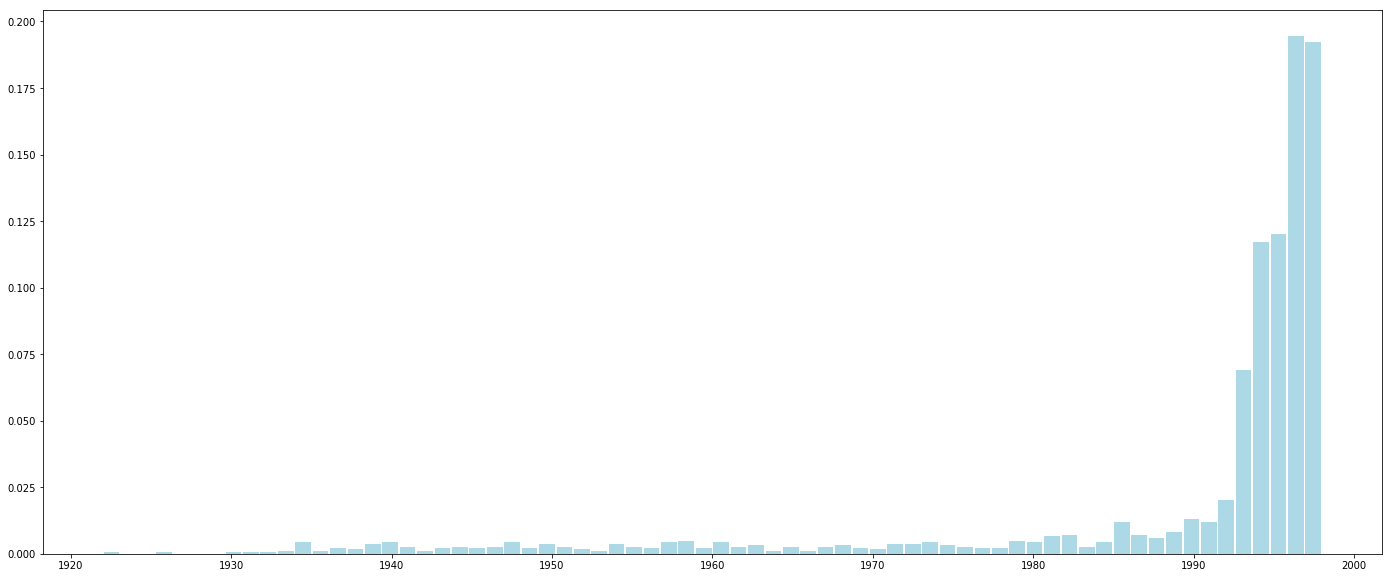

In [14]:
import matplotlib.pyplot as plt

movie_years = movie_year.map(lambda m: m[0])

plt.hist(movie_years.collect(), bins=70, color='lightblue', normed=True, rwidth=0.9)
fig = plt.gcf()
fig.set_size_inches(24, 10)
